In [1]:
#All necessary imports for modeling

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
%matplotlib inline

#Required prediction modelling libraries are imported
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split, cross_validate
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, precision_recall_curve, auc, roc_curve, accuracy_score, recall_score, classification_report, f1_score, precision_score, precision_recall_fscore_support, roc_auc_score, make_scorer
from sklearn.pipeline import Pipeline

from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.pipeline import Pipeline as ImPipeline

import xgboost
from xgboost import XGBClassifier

import pickle
import json


In [3]:
#Reading in final dataset

In [4]:
df = pd.read_csv('./data/final_data.csv')

In [5]:
df.head()

,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department Name,Class_Name,Polarity,Subjective,Clean,String,Polarity_Clean,Subjective_Clean,Positive_Rating
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,0.633333,0.933333,"['absolutely', 'wonderful', 'silky', 'sexy', '...",absolutely wonderful silky sexy comfortable,0.633333,0.933333,1
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,0.339583,0.725000,"['love', 'dress', 'sooo', 'pretty', 'happened'...",love dress sooo pretty happened find store gla...,0.318750,0.725000,1
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0.073675,0.356294,"['high', 'hope', 'dress', 'really', 'wanted', ...",high hope dress really wanted work initially o...,0.079865,0.349762,0
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,0.550000,0.625000,"['love', 'love', 'love', 'jumpsuit', 'fun', 'f...",love love love jumpsuit fun flirty fabulous ev...,0.500000,0.625000,1
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,0.512891,0.568750,"['shirt', 'very', 'flattering', 'due', 'adjust...",shirt very flattering due adjustable front tie...,0.393750,0.568750,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22640 entries, 0 to 22639
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Clothing_ID              22640 non-null  int64  
 1   Age                      22640 non-null  int64  
 2   Title                    19675 non-null  object 
 3   Review_Text              22640 non-null  object 
 4   Rating                   22640 non-null  int64  
 5   Recommended_IND          22640 non-null  int64  
 6   Positive_Feedback_Count  22640 non-null  int64  
 7   Division_Name            22627 non-null  object 
 8   Department Name          22627 non-null  object 
 9   Class_Name               22627 non-null  object 
 10  Polarity                 22640 non-null  float64
 11  Subjective               22640 non-null  float64
 12  Clean                    22640 non-null  object 
 13  String                   22640 non-null  object 
 14  Polarity_Clean        

In [7]:
df.isna().sum()

Clothing_ID                   0
Age                           0
Title                      2965
Review_Text                   0
Rating                        0
Recommended_IND               0
Positive_Feedback_Count       0
Division_Name                13
Department Name              13
Class_Name                   13
Polarity                      0
Subjective                    0
Clean                         0
String                        0
Polarity_Clean                0
Subjective_Clean              0
Positive_Rating               0
dtype: int64

In [8]:
#Confimring no nulls in String column

# Modeling

### Train-Test Split With df

In [9]:
# Specify X as the cleaned strings in df and y as the target-Positive_Rating.
X = df['String']
y = df['Positive_Rating']

In [10]:
#Performed the train-test split, using 20% for the hold-out data.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=42,
                                                    test_size=0.20)

In [11]:
X_train

19805                   love contrast much prettier person
11396    top look better hanger looking feminine plaid ...
7884     much question whether love pant several pair p...
21304    legging warm comfortable thick enough wear pan...
7216                     much lower quality robe purchased
                               ...                        
11964    bought grey gorgeous color like long length ar...
21575    dress really pretty fun see dress tone subtle ...
5390     bought one tee washed time luckily hole yet li...
860      excited see jean since came petite size short ...
15795              bought sweater love one favorite season
Name: String, Length: 18112, dtype: object

### Visually inspecting vecorized data

In [12]:
# Instantiate a vectorizer 
# Instantiate and fit/transform X_train using the TF-IDF vectorizer.
tfidf = TfidfVectorizer()
X_train_vectorized = tfidf.fit_transform(X_train)
X_train_vectorized

<18112x10971 sparse matrix of type '<class 'numpy.float64'>'
	with 467215 stored elements in Compressed Sparse Row format>

In [13]:
# Convert vectorized X_train to a vector for easier visual inspection.
X_train_vec = pd.DataFrame.sparse.from_spmatrix(X_train_vectorized, columns=tfidf.get_feature_names())
X_train_vec

/Users/jillian/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aa,aaaaannnnnnd,aaaahmazing,ab,abbey,abby,abck,abdomen,abdominal,abercrombie,...,ziploc,zipped,zipper,zippered,zipping,zombie,zone,zoom,zooming,zuma
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# Transform test data using TF-IDF Vectorizer trained on X_train, y_train
X_test_vectorized = tfidf.transform(X_test)
X_test_vectorized

<4528x10971 sparse matrix of type '<class 'numpy.float64'>'
	with 114122 stored elements in Compressed Sparse Row format>

In [15]:
# Convert to DataFrame for visual inspection
X_test_vec = pd.DataFrame.sparse.from_spmatrix(X_test_vectorized, columns=tfidf.get_feature_names())
X_test_vec

/Users/jillian/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aa,aaaaannnnnnd,aaaahmazing,ab,abbey,abby,abck,abdomen,abdominal,abercrombie,...,ziploc,zipped,zipper,zippered,zipping,zombie,zone,zoom,zooming,zuma
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4523,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4524,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4525,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4526,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Function to return scores for models with  cross validation

Creating dictionary to input in my function which scores I would like to return. Although my focus is on accuracy, in the event that many of my models have similar accuracy, I may want to look at other scoring outcomes.

In [16]:
scoring = {'accuracy': 'accuracy',
           'precision': make_scorer(precision_score, average='weighted'),
           'recall': make_scorer(recall_score, average='weighted'),
           'f1': make_scorer(f1_score, average='weighted'),
           'log_loss': 'neg_log_loss'
           }

In [17]:
def cross_val(model, X, y, scoring=scoring, cv=5):
    """
    Evaluates a given model/estimator using cross-validation
    and returns a dict containing the absolute vlues of the average (mean) scores
    for classification models.

    clf: scikit-learn classification model
    X: features (no labels)
    y: labels
    scoring: a dictionary of scoring metrics
    cv: cross-validation strategy
    """
    # Score metrics on cross-validated dataset
    scores_dict = cross_validate(model, X, y, scoring=scoring, cv=5, n_jobs=-1)

    # return the average scores for each metric
    return {metric: round(np.mean(scores), 5) for metric, scores in scores_dict.items()}


## Dummy Classifier

/Users/jillian/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


0.770428445229682


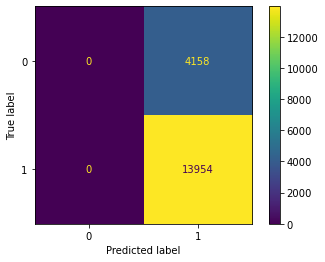

In [18]:
# Instantiate Dummy Classifier 
dummy_model = DummyClassifier()

#Fit and Evaluate Dummy Classifier
dummy_model.fit(X_train_vectorized, y_train)
dummy_yhat = dummy_model.predict(X_train)
plot_confusion_matrix(dummy_model, X_train, y_train);
print(accuracy_score(y_train, dummy_yhat))

We see our Dummy Model predicts our majority label, 1, for each observation. Due to class imbalance, the model performed well at 77% accuracy score.

In [19]:
#testing cross_val function

In [20]:
cross_val(dummy_model, X_train_vectorized, y_train)

{'fit_time': 0.00495,
 'score_time': 0.00541,
 'test_accuracy': 0.77043,
 'test_precision': 0.59356,
 'test_recall': 0.77043,
 'test_f1': 0.67053,
 'test_log_loss': -0.53876}

## Exploring Initial Model CV Results

In [21]:
benchmark = []
# Iterate over all algorithms
for algorithm in [MultinomialNB(), LogisticRegression(), KNeighborsClassifier(), DecisionTreeClassifier(), XGBClassifier(), RandomForestClassifier()]:
    # Perform cross validation
    results = cross_val_score(algorithm, X_train_vectorized, y_train)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)
    
pd.DataFrame(benchmark).set_index('Algorithm')

,0
Algorithm,
MultinomialNB(),0.792237
LogisticRegression(),0.873509
KNeighborsClassifier(),0.813108
DecisionTreeClassifier(),0.781360
"XGBClassifier(base_score=None,",0.861804
RandomForestClassifier(),0.830058


Based on an inital runthough of these algorithms without tuning any model hyperparameters or vectorization paramaeters, Logistic Regression, XGBoost, and Random Forest Classifier are the top 3 performing models. I will explore these models further through grid seraching hyperparameters.

## Logistic Regression

In [26]:
#Instantiating initial Logistic Regression pipeline with no tuning

In [22]:
lr_pipe = Pipeline([
           ('vect', TfidfVectorizer()),
           ('lr', LogisticRegression(random_state=42)),
])

In [23]:
lr_pipe.fit(X_train, y_train)

Pipeline(steps=[('vect', TfidfVectorizer()),
                ('lr', LogisticRegression(random_state=42))])

In [24]:
lr_pipe.score(X_train, y_train)

0.9006183745583038

In [25]:
cross_val(lr_pipe, X_train, y_train)

{'fit_time': 0.43994,
 'score_time': 0.12715,
 'test_accuracy': 0.87401,
 'test_precision': 0.86942,
 'test_recall': 0.87401,
 'test_f1': 0.86637,
 'test_log_loss': -0.29897}

In [36]:
lr_yhat = lr_pipe.predict(X_train)

/Users/jillian/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


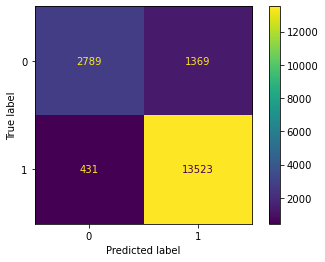

In [37]:
plot_confusion_matrix(lr_pipe, X_train, y_train)

In [51]:
# Show Classification Report
print(classification_report(y_train, lr_yhat))

              precision    recall  f1-score   support

           0       0.87      0.67      0.76      4158
           1       0.91      0.97      0.94     13954

    accuracy                           0.90     18112
   macro avg       0.89      0.82      0.85     18112
weighted avg       0.90      0.90      0.90     18112



In [45]:
lr_pipe_sm = ImPipeline([
           ('vect', TfidfVectorizer()),
            ('sm', ADASYN(random_state=42)),
           ('lr', LogisticRegression(random_state=42)),
])


In [46]:
lr_pipe_sm.fit(X_train, y_train)

Pipeline(steps=[('vect', TfidfVectorizer()), ('sm', ADASYN(random_state=42)),
                ('lr', LogisticRegression(random_state=42))])

In [47]:
lr_pipe_sm.score(X_train, y_train)

0.8964774734982333

In [48]:
cross_val(lr_pipe_sm, X_train, y_train)

{'fit_time': 3.91662,
 'score_time': 0.13175,
 'test_accuracy': 0.85921,
 'test_precision': 0.87594,
 'test_recall': 0.85921,
 'test_f1': 0.86433,
 'test_log_loss': -0.34022}

/Users/jillian/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


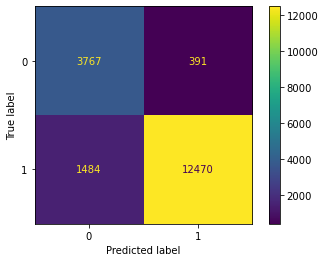

In [49]:
plot_confusion_matrix(lr_pipe_sm, X_train, y_train)

In [53]:
#increasing in precision, decreasing in accuracy; will continue to model without any over sampling techniques as I am not sure if my text data is a good fit for over sampling

### Tuning LR Hyperparameters

In [54]:
#setting up grid to perform grid serach to tune hyperparameters

In [56]:
lr_params = {
    'vect__max_df': (0.5, 0.75, 1.0),
    'vect__max_features': (None, 500, 1000, 2000), 
    'lr__solver': ('lbfgs', 'saga', 'liblinear'),
    'lr__penalty': ('l2', 'elasticnet'),
    'lr__class_weight': (None, 'balanced')
    }

In [57]:
# set up GridSearchCV object
grid_lr = GridSearchCV(lr_pipe, param_grid=lr_params, cv=5, verbose=3)

In [58]:
# fit our grid object for Logistic Regression to the training data
#grid_lr.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV 1/5] END lr__class_weight=None, lr__penalty=l2, lr__solver=lbfgs, vect__max_df=0.5, vect__max_features=None;, score=0.876 total time=   0.5s
[CV 2/5] END lr__class_weight=None, lr__penalty=l2, lr__solver=lbfgs, vect__max_df=0.5, vect__max_features=None;, score=0.874 total time=   0.8s
[CV 3/5] END lr__class_weight=None, lr__penalty=l2, lr__solver=lbfgs, vect__max_df=0.5, vect__max_features=None;, score=0.877 total time=   0.5s
[CV 4/5] END lr__class_weight=None, lr__penalty=l2, lr__solver=lbfgs, vect__max_df=0.5, vect__max_features=None;, score=0.876 total time=   0.5s
[CV 5/5] END lr__class_weight=None, lr__penalty=l2, lr__solver=lbfgs, vect__max_df=0.5, vect__max_features=None;, score=0.868 total time=   0.5s
[CV 1/5] END lr__class_weight=None, lr__penalty=l2, lr__solver=lbfgs, vect__max_df=0.5, vect__max_features=500;, score=0.866 total time=   0.4s
[CV 2/5] END lr__class_weight=None, lr__penalty=l2, lr__solver=lbfgs

[CV 3/5] END lr__class_weight=None, lr__penalty=l2, lr__solver=lbfgs, vect__max_df=1.0, vect__max_features=2000;, score=0.879 total time=   0.4s
[CV 4/5] END lr__class_weight=None, lr__penalty=l2, lr__solver=lbfgs, vect__max_df=1.0, vect__max_features=2000;, score=0.877 total time=   0.4s
[CV 5/5] END lr__class_weight=None, lr__penalty=l2, lr__solver=lbfgs, vect__max_df=1.0, vect__max_features=2000;, score=0.869 total time=   0.4s
[CV 1/5] END lr__class_weight=None, lr__penalty=l2, lr__solver=saga, vect__max_df=0.5, vect__max_features=None;, score=0.876 total time=   0.4s
[CV 2/5] END lr__class_weight=None, lr__penalty=l2, lr__solver=saga, vect__max_df=0.5, vect__max_features=None;, score=0.874 total time=   0.4s
[CV 3/5] END lr__class_weight=None, lr__penalty=l2, lr__solver=saga, vect__max_df=0.5, vect__max_features=None;, score=0.877 total time=   0.4s
[CV 4/5] END lr__class_weight=None, lr__penalty=l2, lr__solver=saga, vect__max_df=0.5, vect__max_features=None;, score=0.876 total ti

[CV 5/5] END lr__class_weight=None, lr__penalty=l2, lr__solver=saga, vect__max_df=1.0, vect__max_features=1000;, score=0.867 total time=   0.4s
[CV 1/5] END lr__class_weight=None, lr__penalty=l2, lr__solver=saga, vect__max_df=1.0, vect__max_features=2000;, score=0.877 total time=   0.4s
[CV 2/5] END lr__class_weight=None, lr__penalty=l2, lr__solver=saga, vect__max_df=1.0, vect__max_features=2000;, score=0.876 total time=   0.4s
[CV 3/5] END lr__class_weight=None, lr__penalty=l2, lr__solver=saga, vect__max_df=1.0, vect__max_features=2000;, score=0.879 total time=   0.4s
[CV 4/5] END lr__class_weight=None, lr__penalty=l2, lr__solver=saga, vect__max_df=1.0, vect__max_features=2000;, score=0.877 total time=   0.4s
[CV 5/5] END lr__class_weight=None, lr__penalty=l2, lr__solver=saga, vect__max_df=1.0, vect__max_features=2000;, score=0.869 total time=   0.4s
[CV 1/5] END lr__class_weight=None, lr__penalty=l2, lr__solver=liblinear, vect__max_df=0.5, vect__max_features=None;, score=0.876 total 

[CV 1/5] END lr__class_weight=None, lr__penalty=l2, lr__solver=liblinear, vect__max_df=1.0, vect__max_features=1000;, score=0.871 total time=   0.4s
[CV 2/5] END lr__class_weight=None, lr__penalty=l2, lr__solver=liblinear, vect__max_df=1.0, vect__max_features=1000;, score=0.871 total time=   0.4s
[CV 3/5] END lr__class_weight=None, lr__penalty=l2, lr__solver=liblinear, vect__max_df=1.0, vect__max_features=1000;, score=0.874 total time=   0.4s
[CV 4/5] END lr__class_weight=None, lr__penalty=l2, lr__solver=liblinear, vect__max_df=1.0, vect__max_features=1000;, score=0.872 total time=   0.4s
[CV 5/5] END lr__class_weight=None, lr__penalty=l2, lr__solver=liblinear, vect__max_df=1.0, vect__max_features=1000;, score=0.867 total time=   0.4s
[CV 1/5] END lr__class_weight=None, lr__penalty=l2, lr__solver=liblinear, vect__max_df=1.0, vect__max_features=2000;, score=0.877 total time=   0.4s
[CV 2/5] END lr__class_weight=None, lr__penalty=l2, lr__solver=liblinear, vect__max_df=1.0, vect__max_feat

[CV 1/5] END lr__class_weight=None, lr__penalty=elasticnet, lr__solver=lbfgs, vect__max_df=1.0, vect__max_features=500;, score=nan total time=   0.3s
[CV 2/5] END lr__class_weight=None, lr__penalty=elasticnet, lr__solver=lbfgs, vect__max_df=1.0, vect__max_features=500;, score=nan total time=   0.3s
[CV 3/5] END lr__class_weight=None, lr__penalty=elasticnet, lr__solver=lbfgs, vect__max_df=1.0, vect__max_features=500;, score=nan total time=   0.3s
[CV 4/5] END lr__class_weight=None, lr__penalty=elasticnet, lr__solver=lbfgs, vect__max_df=1.0, vect__max_features=500;, score=nan total time=   0.3s
[CV 5/5] END lr__class_weight=None, lr__penalty=elasticnet, lr__solver=lbfgs, vect__max_df=1.0, vect__max_features=500;, score=nan total time=   0.3s
[CV 1/5] END lr__class_weight=None, lr__penalty=elasticnet, lr__solver=lbfgs, vect__max_df=1.0, vect__max_features=1000;, score=nan total time=   0.3s
[CV 2/5] END lr__class_weight=None, lr__penalty=elasticnet, lr__solver=lbfgs, vect__max_df=1.0, vec

[CV 1/5] END lr__class_weight=None, lr__penalty=elasticnet, lr__solver=saga, vect__max_df=1.0, vect__max_features=None;, score=nan total time=   0.3s
[CV 2/5] END lr__class_weight=None, lr__penalty=elasticnet, lr__solver=saga, vect__max_df=1.0, vect__max_features=None;, score=nan total time=   0.3s
[CV 3/5] END lr__class_weight=None, lr__penalty=elasticnet, lr__solver=saga, vect__max_df=1.0, vect__max_features=None;, score=nan total time=   0.3s
[CV 4/5] END lr__class_weight=None, lr__penalty=elasticnet, lr__solver=saga, vect__max_df=1.0, vect__max_features=None;, score=nan total time=   0.3s
[CV 5/5] END lr__class_weight=None, lr__penalty=elasticnet, lr__solver=saga, vect__max_df=1.0, vect__max_features=None;, score=nan total time=   0.3s
[CV 1/5] END lr__class_weight=None, lr__penalty=elasticnet, lr__solver=saga, vect__max_df=1.0, vect__max_features=500;, score=nan total time=   0.3s
[CV 2/5] END lr__class_weight=None, lr__penalty=elasticnet, lr__solver=saga, vect__max_df=1.0, vect__

[CV 5/5] END lr__class_weight=None, lr__penalty=elasticnet, lr__solver=liblinear, vect__max_df=0.75, vect__max_features=1000;, score=nan total time=   0.3s
[CV 1/5] END lr__class_weight=None, lr__penalty=elasticnet, lr__solver=liblinear, vect__max_df=0.75, vect__max_features=2000;, score=nan total time=   0.3s
[CV 2/5] END lr__class_weight=None, lr__penalty=elasticnet, lr__solver=liblinear, vect__max_df=0.75, vect__max_features=2000;, score=nan total time=   0.3s
[CV 3/5] END lr__class_weight=None, lr__penalty=elasticnet, lr__solver=liblinear, vect__max_df=0.75, vect__max_features=2000;, score=nan total time=   0.3s
[CV 4/5] END lr__class_weight=None, lr__penalty=elasticnet, lr__solver=liblinear, vect__max_df=0.75, vect__max_features=2000;, score=nan total time=   0.3s
[CV 5/5] END lr__class_weight=None, lr__penalty=elasticnet, lr__solver=liblinear, vect__max_df=0.75, vect__max_features=2000;, score=nan total time=   0.3s
[CV 1/5] END lr__class_weight=None, lr__penalty=elasticnet, lr__

[CV 4/5] END lr__class_weight=balanced, lr__penalty=l2, lr__solver=lbfgs, vect__max_df=0.75, vect__max_features=500;, score=0.832 total time=   0.4s
[CV 5/5] END lr__class_weight=balanced, lr__penalty=l2, lr__solver=lbfgs, vect__max_df=0.75, vect__max_features=500;, score=0.832 total time=   0.4s
[CV 1/5] END lr__class_weight=balanced, lr__penalty=l2, lr__solver=lbfgs, vect__max_df=0.75, vect__max_features=1000;, score=0.846 total time=   0.4s
[CV 2/5] END lr__class_weight=balanced, lr__penalty=l2, lr__solver=lbfgs, vect__max_df=0.75, vect__max_features=1000;, score=0.852 total time=   0.4s
[CV 3/5] END lr__class_weight=balanced, lr__penalty=l2, lr__solver=lbfgs, vect__max_df=0.75, vect__max_features=1000;, score=0.853 total time=   0.4s
[CV 4/5] END lr__class_weight=balanced, lr__penalty=l2, lr__solver=lbfgs, vect__max_df=0.75, vect__max_features=1000;, score=0.840 total time=   0.4s
[CV 5/5] END lr__class_weight=balanced, lr__penalty=l2, lr__solver=lbfgs, vect__max_df=0.75, vect__max

[CV 5/5] END lr__class_weight=balanced, lr__penalty=l2, lr__solver=saga, vect__max_df=0.75, vect__max_features=None;, score=0.850 total time=   0.4s
[CV 1/5] END lr__class_weight=balanced, lr__penalty=l2, lr__solver=saga, vect__max_df=0.75, vect__max_features=500;, score=0.834 total time=   0.4s
[CV 2/5] END lr__class_weight=balanced, lr__penalty=l2, lr__solver=saga, vect__max_df=0.75, vect__max_features=500;, score=0.841 total time=   0.4s
[CV 3/5] END lr__class_weight=balanced, lr__penalty=l2, lr__solver=saga, vect__max_df=0.75, vect__max_features=500;, score=0.843 total time=   0.4s
[CV 4/5] END lr__class_weight=balanced, lr__penalty=l2, lr__solver=saga, vect__max_df=0.75, vect__max_features=500;, score=0.832 total time=   0.4s
[CV 5/5] END lr__class_weight=balanced, lr__penalty=l2, lr__solver=saga, vect__max_df=0.75, vect__max_features=500;, score=0.831 total time=   0.4s
[CV 1/5] END lr__class_weight=balanced, lr__penalty=l2, lr__solver=saga, vect__max_df=0.75, vect__max_features=

[CV 5/5] END lr__class_weight=balanced, lr__penalty=l2, lr__solver=liblinear, vect__max_df=0.5, vect__max_features=2000;, score=0.847 total time=   0.4s
[CV 1/5] END lr__class_weight=balanced, lr__penalty=l2, lr__solver=liblinear, vect__max_df=0.75, vect__max_features=None;, score=0.860 total time=   0.4s
[CV 2/5] END lr__class_weight=balanced, lr__penalty=l2, lr__solver=liblinear, vect__max_df=0.75, vect__max_features=None;, score=0.860 total time=   0.5s
[CV 3/5] END lr__class_weight=balanced, lr__penalty=l2, lr__solver=liblinear, vect__max_df=0.75, vect__max_features=None;, score=0.866 total time=   0.4s
[CV 4/5] END lr__class_weight=balanced, lr__penalty=l2, lr__solver=liblinear, vect__max_df=0.75, vect__max_features=None;, score=0.849 total time=   0.4s
[CV 5/5] END lr__class_weight=balanced, lr__penalty=l2, lr__solver=liblinear, vect__max_df=0.75, vect__max_features=None;, score=0.850 total time=   0.4s
[CV 1/5] END lr__class_weight=balanced, lr__penalty=l2, lr__solver=liblinear,

[CV 4/5] END lr__class_weight=balanced, lr__penalty=elasticnet, lr__solver=lbfgs, vect__max_df=0.5, vect__max_features=1000;, score=nan total time=   0.3s
[CV 5/5] END lr__class_weight=balanced, lr__penalty=elasticnet, lr__solver=lbfgs, vect__max_df=0.5, vect__max_features=1000;, score=nan total time=   0.3s
[CV 1/5] END lr__class_weight=balanced, lr__penalty=elasticnet, lr__solver=lbfgs, vect__max_df=0.5, vect__max_features=2000;, score=nan total time=   0.3s
[CV 2/5] END lr__class_weight=balanced, lr__penalty=elasticnet, lr__solver=lbfgs, vect__max_df=0.5, vect__max_features=2000;, score=nan total time=   0.3s
[CV 3/5] END lr__class_weight=balanced, lr__penalty=elasticnet, lr__solver=lbfgs, vect__max_df=0.5, vect__max_features=2000;, score=nan total time=   0.3s
[CV 4/5] END lr__class_weight=balanced, lr__penalty=elasticnet, lr__solver=lbfgs, vect__max_df=0.5, vect__max_features=2000;, score=nan total time=   0.3s
[CV 5/5] END lr__class_weight=balanced, lr__penalty=elasticnet, lr__so

[CV 2/5] END lr__class_weight=balanced, lr__penalty=elasticnet, lr__solver=saga, vect__max_df=0.5, vect__max_features=500;, score=nan total time=   0.3s
[CV 3/5] END lr__class_weight=balanced, lr__penalty=elasticnet, lr__solver=saga, vect__max_df=0.5, vect__max_features=500;, score=nan total time=   0.3s
[CV 4/5] END lr__class_weight=balanced, lr__penalty=elasticnet, lr__solver=saga, vect__max_df=0.5, vect__max_features=500;, score=nan total time=   0.3s
[CV 5/5] END lr__class_weight=balanced, lr__penalty=elasticnet, lr__solver=saga, vect__max_df=0.5, vect__max_features=500;, score=nan total time=   0.3s
[CV 1/5] END lr__class_weight=balanced, lr__penalty=elasticnet, lr__solver=saga, vect__max_df=0.5, vect__max_features=1000;, score=nan total time=   0.3s
[CV 2/5] END lr__class_weight=balanced, lr__penalty=elasticnet, lr__solver=saga, vect__max_df=0.5, vect__max_features=1000;, score=nan total time=   0.3s
[CV 3/5] END lr__class_weight=balanced, lr__penalty=elasticnet, lr__solver=saga,

[CV 1/5] END lr__class_weight=balanced, lr__penalty=elasticnet, lr__solver=liblinear, vect__max_df=0.5, vect__max_features=None;, score=nan total time=   0.3s
[CV 2/5] END lr__class_weight=balanced, lr__penalty=elasticnet, lr__solver=liblinear, vect__max_df=0.5, vect__max_features=None;, score=nan total time=   0.3s
[CV 3/5] END lr__class_weight=balanced, lr__penalty=elasticnet, lr__solver=liblinear, vect__max_df=0.5, vect__max_features=None;, score=nan total time=   0.3s
[CV 4/5] END lr__class_weight=balanced, lr__penalty=elasticnet, lr__solver=liblinear, vect__max_df=0.5, vect__max_features=None;, score=nan total time=   0.3s
[CV 5/5] END lr__class_weight=balanced, lr__penalty=elasticnet, lr__solver=liblinear, vect__max_df=0.5, vect__max_features=None;, score=nan total time=   0.3s
[CV 1/5] END lr__class_weight=balanced, lr__penalty=elasticnet, lr__solver=liblinear, vect__max_df=0.5, vect__max_features=500;, score=nan total time=   0.3s
[CV 2/5] END lr__class_weight=balanced, lr__pen

[CV 3/5] END lr__class_weight=balanced, lr__penalty=elasticnet, lr__solver=liblinear, vect__max_df=1.0, vect__max_features=1000;, score=nan total time=   0.3s
[CV 4/5] END lr__class_weight=balanced, lr__penalty=elasticnet, lr__solver=liblinear, vect__max_df=1.0, vect__max_features=1000;, score=nan total time=   0.3s
[CV 5/5] END lr__class_weight=balanced, lr__penalty=elasticnet, lr__solver=liblinear, vect__max_df=1.0, vect__max_features=1000;, score=nan total time=   0.3s
[CV 1/5] END lr__class_weight=balanced, lr__penalty=elasticnet, lr__solver=liblinear, vect__max_df=1.0, vect__max_features=2000;, score=nan total time=   0.3s
[CV 2/5] END lr__class_weight=balanced, lr__penalty=elasticnet, lr__solver=liblinear, vect__max_df=1.0, vect__max_features=2000;, score=nan total time=   0.3s
[CV 3/5] END lr__class_weight=balanced, lr__penalty=elasticnet, lr__solver=liblinear, vect__max_df=1.0, vect__max_features=2000;, score=nan total time=   0.3s
[CV 4/5] END lr__class_weight=balanced, lr__pe

/Users/jillian/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
360 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/jillian/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/jillian/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 382, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/jillian/opt/anaconda3/envs/learn-env/lib/python3.8/sit

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vect', TfidfVectorizer()),
                                       ('lr',
                                        LogisticRegression(random_state=42))]),
             param_grid={'lr__class_weight': (None, 'balanced'),
                         'lr__penalty': ('l2', 'elasticnet'),
                         'lr__solver': ('lbfgs', 'saga', 'liblinear'),
                         'vect__max_df': (0.5, 0.75, 1.0),
                         'vect__max_features': (None, 500, 1000, 2000)},
             verbose=3)

In [59]:
#best_parameters = grid_lr.best_params_

#print('Grid Search found the following optimal parameters: ')
#for param_name in sorted(best_parameters.keys()):
    #print('%s: %r' % (param_name, best_parameters[param_name]))

#training_preds = grid_lr.predict(X_train)
#training_accuracy = accuracy_score(y_train, training_preds)
#training_recall = recall_score(y_train, training_preds, average = None)

#print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
#print(training_recall)

Grid Search found the following optimal parameters: 
lr__class_weight: None
lr__penalty: 'l2'
lr__solver: 'saga'
vect__max_df: 0.5
vect__max_features: 2000
Training Accuracy: 89.54%
[0.66329966 0.96459796]


Grid Search found the following optimal parameters: 
- lr__class_weight: None
- lr__penalty: 'l2'
- lr__solver: 'saga'
- vect__max_df: 0.5
- vect__max_features: 2000
- Training Accuracy: 89.54%
- [0.66329966 0.96459796]

In [ ]:
#improved training accuracy! Let's see if we can improve it further. Our max_df came in at the lowest parameter, so I will lower further. Max features came in at highest parameter so will try higher parameters.

In [71]:
lr2_params = {
    'vect__max_df': (0.4, 0.5, .6),
    'vect__max_features': (2000, 2250, 2500, 3000), 
    'lr__solver': ('lbfgs', 'saga', 'liblinear'),
    'lr__penalty': ('none', 'l1', 'l2', 'elasticnet'),
    'lr__class_weight': (None, 'balanced')
    }

In [72]:
grid_lr2 = GridSearchCV(lr_pipe, param_grid=lr2_params, cv=5, verbose=3, n_jobs=-2)

In [73]:
#grid_lr2.fit(X_train, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


/Users/jillian/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
600 fits failed out of a total of 1440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/jillian/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/jillian/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 382, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/jillian/opt/anaconda3/envs/learn-env/lib/python3.8/si

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vect', TfidfVectorizer()),
                                       ('lr',
                                        LogisticRegression(random_state=42))]),
             n_jobs=-2,
             param_grid={'lr__class_weight': (None, 'balanced'),
                         'lr__penalty': ('none', 'l1', 'l2', 'elasticnet'),
                         'lr__solver': ('lbfgs', 'saga', 'liblinear'),
                         'vect__max_df': (0.4, 0.5, 0.6),
                         'vect__max_features': (2000, 2250, 2500, 3000)},
             verbose=3)

In [74]:
#best_parameters = grid_lr2.best_params_

#print('Grid Search found the following optimal parameters: ')
#for param_name in sorted(best_parameters.keys()):
    #print('%s: %r' % (param_name, best_parameters[param_name]))

#training_preds = grid_lr2.predict(X_train)
#training_accuracy = accuracy_score(y_train, training_preds)
#training_recall = recall_score(y_train, training_preds, average = None)

#print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
#print(training_recall)

Grid Search found the following optimal parameters: 
lr__class_weight: None
lr__penalty: 'l2'
lr__solver: 'lbfgs'
vect__max_df: 0.4
vect__max_features: 3000
Training Accuracy: 89.84%
[0.66738817 0.96724953]


Grid Search found the following optimal parameters: 
- lr__class_weight: None
- lr__penalty: 'l2'
- lr__solver: 'lbfgs'
- vect__max_df: 0.4
- vect__max_features: 3000
- Training Accuracy: 89.84%
- [0.66738817 0.96724953]

In [79]:
#maxed out max_features again and hit minimum max_df; adding in n_gram_range to search for unigrams and bigrams

In [161]:
lr2_pipe = Pipeline([
           ('vect', TfidfVectorizer(max_df=.4, max_features=3000)),
           ('lr', LogisticRegression(random_state=42, class_weight=None, solver='lbfgs', penalty='l2')),
])

In [162]:
lr2_pipe.fit(X_train, y_train)

Pipeline(steps=[('vect', TfidfVectorizer(max_df=0.4, max_features=3000)),
                ('lr', LogisticRegression(random_state=42))])

In [163]:
lr2_pipe.score(X_train, y_train)

0.8984098939929329

In [164]:
cross_val(lr2_pipe, X_train, y_train)

{'fit_time': 0.38827,
 'score_time': 0.13751,
 'test_accuracy': 0.87594,
 'test_precision': 0.87151,
 'test_recall': 0.87594,
 'test_f1': 0.8687,
 'test_log_loss': -0.29704}

In [80]:
lr3_params = {
    'vect__max_df': (.25, .3, .4, .45),
    'vect__max_features': (2500, 2750, 3000, 3200),
    'vect__ngram_range': [(1,1), (1,2), (2,2)],
    'lr__solver': ('lbfgs', 'saga', 'liblinear'),
    'lr__penalty': ('l2', 'elasticnet'),
    'lr__class_weight': (None, 'balanced')
    }

In [81]:
grid_lr3 = GridSearchCV(lr_pipe, param_grid=lr3_params, cv=5, verbose=3, n_jobs=-2)

In [82]:
#grid_lr3.fit(X_train, y_train)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


/Users/jillian/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/jillian/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
1440 fits failed out of a total of 2880.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
480 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/jillian/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vect', TfidfVectorizer()),
                                       ('lr',
                                        LogisticRegression(random_state=42))]),
             n_jobs=-2,
             param_grid={'lr__class_weight': (None, 'balanced'),
                         'lr__penalty': ('l2', 'elasticnet'),
                         'lr__solver': ('lbfgs', 'saga', 'liblinear'),
                         'vect__max_df': (0.25, 0.3, 0.4, 0.45),
                         'vect__max_features': (2500, 2750, 3000, 3200),
                         'vect__ngram_range': [(1, 1), (1, 2), (2, 2)]},
             verbose=3)

In [83]:
#best_parameters = grid_lr3.best_params_

#print('Grid Search found the following optimal parameters: ')
#for param_name in sorted(best_parameters.keys()):
#    print('%s: %r' % (param_name, best_parameters[param_name]))

#training_preds = grid_lr3.predict(X_train)
#training_accuracy = accuracy_score(y_train, training_preds)
#training_recall = recall_score(y_train, training_preds, average = None)

#print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
#print(training_recall)

Grid Search found the following optimal parameters: 
lr__class_weight: None
lr__penalty: 'l2'
lr__solver: 'lbfgs'
vect__max_df: 0.4
vect__max_features: 3000
vect__ngram_range: (1, 1)
Training Accuracy: 89.84%
[0.66738817 0.96724953]


Grid Search found the following optimal parameters: 
- lr__class_weight: None
- lr__penalty: 'l2'
- lr__solver: 'lbfgs'
- vect__max_df: 0.4
- vect__max_features: 3000
- vect__ngram_range: (1, 1)
- Training Accuracy: 89.84%
- [0.66738817 0.96724953]

In [165]:
#same results as lr2_pipe since ngram_range(1,1) is default and the only parameter that changed

In [168]:
lr4_params = {
    'vect__max_df': (.35, .4, .45),
    'vect__max_features': (2800, 2900, 3000, 3100),
    'vect__ngram_range': [(1,1), (1,2), (2,2)],
    'lr__solver': ('lbfgs', 'saga', 'liblinear'),
    'lr__penalty': ('l2', 'elasticnet'),
    'lr__class_weight': (None, 'balanced')
    }

In [169]:
grid_lr4 = GridSearchCV(lr_pipe, param_grid=lr4_params, cv=5, verbose=3, n_jobs=-2)

In [170]:
grid_lr4.fit(X_train, y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


/Users/jillian/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/jillian/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
1080 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/jillian/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vect', TfidfVectorizer()),
                                       ('lr',
                                        LogisticRegression(random_state=42))]),
             n_jobs=-2,
             param_grid={'lr__class_weight': (None, 'balanced'),
                         'lr__penalty': ('l2', 'elasticnet'),
                         'lr__solver': ('lbfgs', 'saga', 'liblinear'),
                         'vect__max_df': (0.35, 0.4, 0.45),
                         'vect__max_features': (2800, 2900, 3000, 3100),
                         'vect__ngram_range': [(1, 1), (1, 2), (2, 2)]},
             verbose=3)

In [171]:
#best_parameters = grid_lr4.best_params_

#print('Grid Search found the following optimal parameters: ')
#for param_name in sorted(best_parameters.keys()):
#    print('%s: %r' % (param_name, best_parameters[param_name]))

#training_preds = grid_lr4.predict(X_train)
#training_accuracy = accuracy_score(y_train, training_preds)
#training_recall = recall_score(y_train, training_preds, average = None)

#print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
#print(training_recall)

Grid Search found the following optimal parameters: 
lr__class_weight: None
lr__penalty: 'l2'
lr__solver: 'saga'
vect__max_df: 0.4
vect__max_features: 2800
vect__ngram_range: (1, 1)
Training Accuracy: 89.8%
[0.66642617 0.96696288]


Grid Search found the following optimal parameters: 
- lr__class_weight: None
- lr__penalty: 'l2'
- lr__solver: 'saga'
- vect__max_df: 0.4
- vect__max_features: 2800
- vect__ngram_range: (1, 1)
- Training Accuracy: 89.8%
- [0.66642617 0.96696288]

In [172]:
lr4_pipe = Pipeline([
           ('vect', TfidfVectorizer(max_df=.4, max_features=2800)),
           ('lr', LogisticRegression(random_state=42, class_weight=None, solver='saga', penalty='l2')),
])

In [173]:
lr4_pipe.fit(X_train, y_train)

Pipeline(steps=[('vect', TfidfVectorizer(max_df=0.4, max_features=2800)),
                ('lr', LogisticRegression(random_state=42, solver='saga'))])

In [174]:
lr4_pipe.score(X_train, y_train)

0.8979681978798587

In [175]:
cross_val(lr4_pipe, X_train, y_train)

{'fit_time': 0.3633,
 'score_time': 0.14218,
 'test_accuracy': 0.87621,
 'test_precision': 0.8718,
 'test_recall': 0.87621,
 'test_f1': 0.86905,
 'test_log_loss': -0.29686}

In [176]:
#best accuracy so far

/Users/jillian/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


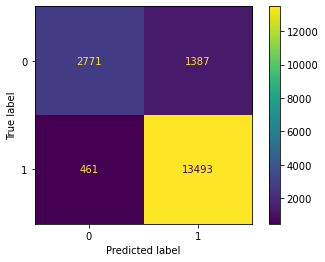

In [177]:
plot_confusion_matrix(lr4_pipe, X_train, y_train);

In [182]:
#comparing with ngram_range of (1,2) for inspection

In [179]:
lr5_pipe = Pipeline([
           ('vect', TfidfVectorizer(max_df=.4, max_features=2800, ngram_range=(1,2))),
           ('lr', LogisticRegression(random_state=42, class_weight=None, solver='saga', penalty='l2')),
])

In [180]:
lr5_pipe.fit(X_train, y_train)

Pipeline(steps=[('vect',
                 TfidfVectorizer(max_df=0.4, max_features=2800,
                                 ngram_range=(1, 2))),
                ('lr', LogisticRegression(random_state=42, solver='saga'))])

In [181]:
cross_val(lr5_pipe, X_train, y_train)

{'fit_time': 1.00929,
 'score_time': 0.25262,
 'test_accuracy': 0.87544,
 'test_precision': 0.871,
 'test_recall': 0.87544,
 'test_f1': 0.86811,
 'test_log_loss': -0.29502}

## XGBoost

In [103]:
# Instantiate our default XGB pipeline
XGB_pipe = ImPipeline(steps=[('vect', TfidfVectorizer()), 
                             ('XGB', XGBClassifier())])

In [104]:
XGB_pipe.fit(X_train, y_train)

Pipeline(steps=[('vect', TfidfVectorizer()),
                ('XGB',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=0, num_parallel_tree=1, random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=1, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

In [105]:
XGB_pipe.score(X_train, y_train)

0.9439598056537103

In [106]:
cross_val(XGB_pipe, X_train, y_train)

{'fit_time': 6.85527,
 'score_time': 0.16507,
 'test_accuracy': 0.86136,
 'test_precision': 0.85485,
 'test_recall': 0.86136,
 'test_f1': 0.85332,
 'test_log_loss': -0.31619}

### Tuning XGBoost Hyperparameters

In [107]:
# create our massive grid for the grid search parameters
paramsXGB = {
    'XGB__learning_rate': [0.1, 0.2],
    'XGB__max_depth': [5, 10, 15],
    'XGB__min_child_weight': range(1, 8, 2),
    'XGB__gamma': [0, .1, .2],
    'XGB__subsample': [.5, .75, 1],
    'vect__ngram_range': [(1,1), (1,2)],
}

In [108]:
#Fit grid search object to our training data 
grid_XGB = GridSearchCV(XGB_pipe, param_grid=paramsXGB, cv=5, verbose=3, n_jobs=-2)

In [109]:
#grid_XGB.fit(X_train, y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


/Users/jillian/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vect', TfidfVectorizer()),
                                       ('XGB',
                                        XGBClassifier(base_score=0.5,
                                                      booster='gbtree',
                                                      colsample_bylevel=1,
                                                      colsample_bynode=1,
                                                      colsample_bytree=1,
                                                      gamma=0, gpu_id=-1,
                                                      importance_type='gain',
                                                      interaction_constraints='',
                                                      learning_rate=0.300000012,
                                                      max_delta_step=0,
                                                      max_depth=6,
                                                      min_child_weight=1,
                                                      missing=nan,
                                                      monotone_const...
                                                      num_parallel_tree=1,
                                                      random_state=0,
                                                      reg_alpha=0, reg_lambda=1,
                                                      scale_pos_weight=1,
                                                      subsample=1,
                                                      tree_method='exact',
                                                      validate_parameters=1,
                                                      verbosity=None))]),
             n_jobs=-2,
             param_grid={'XGB__gamma': [0, 0.1, 0.2],
                         'XGB__learning_rate': [0.1, 0.2],
                         'XGB__max_depth': [5, 10, 15],
                         'XGB__min_child_weight': range(1, 8, 2),
                         'XGB__subsample': [0.5, 0.75, 1],
                         'vect__ngram_range': [(1, 1), (1, 2)]},
             verbose=3)

In [110]:
#best_parameters = grid_XGB.best_params_

#print('Grid Search found the following optimal parameters: ')
#for param_name in sorted(best_parameters.keys()):
#    print('%s: %r' % (param_name, best_parameters[param_name]))

#training_preds = grid_XGB.predict(X_train)
#training_accuracy = accuracy_score(y_train, training_preds)
#training_recall = recall_score(y_train, training_preds, average = None)

#print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
#print(training_recall)

Grid Search found the following optimal parameters: 
XGB__gamma: 0.2
XGB__learning_rate: 0.2
XGB__max_depth: 10
XGB__min_child_weight: 5
XGB__subsample: 0.75
vect__ngram_range: (1, 2)
Training Accuracy: 93.32%
[0.77561328 0.98022073]


Grid Search found the following optimal parameters: 
- XGB__gamma: 0.2
- XGB__learning_rate: 0.2
- XGB__max_depth: 10
- XGB__min_child_weight: 5
- XGB__subsample: 0.75
- vect__ngram_range: (1, 2)
- Training Accuracy: 93.32%
- [0.77561328 0.98022073]

In [ ]:
#XGB has long fit time, grid searches take extremely long compared to LR and RFC

In [ ]:
#need to tune vectorizor max features definetly

In [118]:
# Instantiate our XGB2 pipeline
XGB2_pipe = ImPipeline(steps=[('vect', TfidfVectorizer(ngram_range=(1,2))), 
                             ('XGB', XGBClassifier(gamma=.2, learning_rate=.2, max_depth=10, min_child_weight=5, subsample=.75))])

In [119]:
XGB2_pipe.fit(X_train, y_train)

Pipeline(steps=[('vect', TfidfVectorizer(ngram_range=(1, 2))),
                ('XGB',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0.2, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='', learning_rate=0.2,
                               max_delta_step=0, max_depth=10,
                               min_child_weight=5, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=0, num_parallel_tree=1, random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=0.75, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

In [120]:
XGB2_pipe.score(X_train, y_train)

0.9332486749116607

In [121]:
cross_val(XGB2_pipe, X_train, y_train)

{'fit_time': 29.19305,
 'score_time': 0.38804,
 'test_accuracy': 0.86942,
 'test_precision': 0.86401,
 'test_recall': 0.86942,
 'test_f1': 0.86421,
 'test_log_loss': -0.30814}

In [123]:
#accuracy of 86.9%, slightly below best LR model

/Users/jillian/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


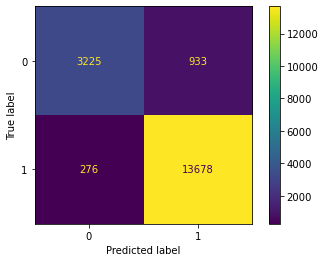

In [122]:
plot_confusion_matrix(XGB2_pipe, X_train, y_train);

## Random Forest Classifier

In [124]:
# Create our random forest pipeline to incorporate vectorizer, use default hyperparameters
rfc_pipe = Pipeline(steps=[('vect', TfidfVectorizer()),
                           ('rfc', RandomForestClassifier(random_state=42))])

In [125]:
# Fit our random forest classifier to the training data
rfc_pipe.fit(X_train, y_train)

Pipeline(steps=[('vect', TfidfVectorizer()),
                ('rfc', RandomForestClassifier(random_state=42))])

In [126]:
# Calculate initial accuracy score of random forest with default hyperparameters
rfc_pipe.score(X_train, y_train)

1.0

In [128]:
#unsurprisingly overfit to accuracy of 1

In [127]:
cross_val(rfc_pipe, X_train, y_train)

{'fit_time': 6.89991,
 'score_time': 0.36,
 'test_accuracy': 0.83149,
 'test_precision': 0.83496,
 'test_recall': 0.83149,
 'test_f1': 0.80044,
 'test_log_loss': -0.36066}

In [129]:
# create our massive grid for the grid search parameters
params = {'rfc__n_estimators': [75, 100, 150],
           'rfc__max_depth': [50, 100, 150],
           'rfc__max_features': ['sqrt', 'log2'],
           'rfc__min_samples_leaf': [5, 10, 25],
           'rfc__min_impurity_decrease': [0, 0.05],
           'rfc__criterion': ['gini', 'entropy'],
            'vect__max_features': (2500, 3000),
            'vect__ngram_range': [(1,1), (1,2)],}

# set up GridSearchCV object
grid_rfc = GridSearchCV(rfc_pipe, param_grid=params, cv=3, n_jobs=-2, verbose=3)

In [131]:
#grid_rfc.fit(X_train, y_train)

Fitting 3 folds for each of 864 candidates, totalling 2592 fits


/Users/jillian/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('vect', TfidfVectorizer()),
                                       ('rfc',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-2,
             param_grid={'rfc__criterion': ['gini', 'entropy'],
                         'rfc__max_depth': [50, 100, 150],
                         'rfc__max_features': ['sqrt', 'log2'],
                         'rfc__min_impurity_decrease': [0, 0.05],
                         'rfc__min_samples_leaf': [5, 10, 25],
                         'rfc__n_estimators': [75, 100, 150],
                         'vect__max_features': (2500, 3000),
                         'vect__ngram_range': [(1, 1), (1, 2)]},
             verbose=3)

In [133]:
#best_parameters = grid_rfc.best_params_

#print('Grid Search found the following optimal parameters: ')
#for param_name in sorted(best_parameters.keys()):
#    print('%s: %r' % (param_name, best_parameters[param_name]))

#training_preds = grid_rfc.predict(X_train)
#training_accuracy = accuracy_score(y_train, training_preds)
#training_recall = recall_score(y_train, training_preds, average = None)

#print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
#print(training_recall)


Grid Search found the following optimal parameters: 
rfc__criterion: 'entropy'
rfc__max_depth: 100
rfc__max_features: 'sqrt'
rfc__min_impurity_decrease: 0
rfc__min_samples_leaf: 5
rfc__n_estimators: 75
vect__max_features: 2500
vect__ngram_range: (1, 2)
Training Accuracy: 90.06%
[0.5959596  0.99132865]


Grid Search found the following optimal parameters: 
- rfc__criterion: 'entropy'
- rfc__max_depth: 100
- rfc__max_features: 'sqrt'
- rfc__min_impurity_decrease: 0
- rfc__min_samples_leaf: 5
- rfc__n_estimators: 75
- vect__max_features: 2500
- vect__ngram_range: (1, 2)
- Training Accuracy: 90.06%
- [0.5959596  0.99132865]

In [135]:
#hit lower boundary of  min_samples_leaf and n_estimators and vect_max_features,

In [137]:
# create our massive grid for the grid search parameters
params2 = {'rfc__n_estimators': [70, 75, 80],
           'rfc__max_depth': [75, 100, 125],
           'rfc__max_features': ['sqrt', 'log2'],
           'rfc__min_samples_leaf': [4, 5, 6],
           'rfc__criterion': ['gini', 'entropy'],
            'vect__max_features': (2250, 2500, 2750),
            'vect__ngram_range': [(1,1), (1,2)],}

# set up GridSearchCV object
grid_rfc2 = GridSearchCV(rfc_pipe, param_grid=params2, cv=3, n_jobs=-2, verbose=3)

In [138]:
#grid_rfc2.fit(X_train, y_train)

Fitting 3 folds for each of 648 candidates, totalling 1944 fits


/Users/jillian/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('vect', TfidfVectorizer()),
                                       ('rfc',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-2,
             param_grid={'rfc__criterion': ['gini', 'entropy'],
                         'rfc__max_depth': [75, 100, 125],
                         'rfc__max_features': ['sqrt', 'log2'],
                         'rfc__min_samples_leaf': [4, 5, 6],
                         'rfc__n_estimators': [70, 75, 80],
                         'vect__max_features': (2250, 2500, 2750),
                         'vect__ngram_range': [(1, 1), (1, 2)]},
             verbose=3)

In [151]:
#best_parameters = grid_rfc2.best_params_

#print('Grid Search found the following optimal parameters: ')
#for param_name in sorted(best_parameters.keys()):
#    print('%s: %r' % (param_name, best_parameters[param_name]))

#training_preds = grid_rfc2.predict(X_train)
#training_accuracy = accuracy_score(y_train, training_preds)
#training_recall = recall_score(y_train, training_preds, average = None)

#print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
#print(training_recall)

Grid Search found the following optimal parameters: 
- rfc__criterion: 'entropy'
- rfc__max_depth: 125
- rfc__max_features: 'sqrt'
- rfc__min_samples_leaf: 4
- rfc__n_estimators: 75
- vect__max_features: 2250
- vect__ngram_range: (1, 2)
- Training Accuracy: 92.19%
- [0.68302068 0.99304859]

In [142]:
rfc_pipe2 = Pipeline(steps=[('vect', TfidfVectorizer(max_features=2250, ngram_range=(1,2))),
                           ('rfc', RandomForestClassifier(random_state=42, criterion='entropy', max_depth=125,
                                                         max_features='sqrt', min_samples_leaf=4, n_estimators=75))])

In [143]:
rfc_pipe2.fit(X_train, y_train)

Pipeline(steps=[('vect',
                 TfidfVectorizer(max_features=2250, ngram_range=(1, 2))),
                ('rfc',
                 RandomForestClassifier(criterion='entropy', max_depth=125,
                                        min_samples_leaf=4, n_estimators=75,
                                        random_state=42))])

In [144]:
rfc_pipe2.score(X_train, y_train)

0.921875

In [145]:
cross_val(rfc_pipe2, X_train, y_train)

{'fit_time': 4.42471,
 'score_time': 0.34291,
 'test_accuracy': 0.84132,
 'test_precision': 0.84094,
 'test_recall': 0.84132,
 'test_f1': 0.8177,
 'test_log_loss': -0.35736}

In [146]:
#still not as good as logistic regression, maxed out max_depth and min of min_samples_leaf

In [152]:
# create our massive grid for the grid search parameters
params3 = {'rfc__n_estimators': [70, 75, 80],
           'rfc__max_depth': [125, 150, 175],
           'rfc__max_features': ['sqrt', 'log2'],
           'rfc__min_samples_leaf': [1, 2, 4],
           'rfc__criterion': ['gini', 'entropy'],
            'vect__max_features': (1750, 2000, 2250),
            'vect__ngram_range': [(1,1), (1,2)],}

# set up GridSearchCV object
grid_rfc3 = GridSearchCV(rfc_pipe, param_grid=params3, cv=3, n_jobs=-2, verbose=3)

In [153]:
#grid_rfc3.fit(X_train, y_train)

Fitting 3 folds for each of 648 candidates, totalling 1944 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('vect',
                                        TfidfVectorizer(max_features=2250,
                                                        ngram_range=(1, 2))),
                                       ('rfc',
                                        RandomForestClassifier(criterion='entropy',
                                                               max_depth=125,
                                                               min_samples_leaf=4,
                                                               n_estimators=75,
                                                               random_state=42))]),
             n_jobs=-2,
             param_grid={'rfc__criterion': ['gini', 'entropy'],
                         'rfc__max_depth': [125, 150, 175],
                         'rfc__max_features': ['sqrt', 'log2'],
                         'rfc__min_samples_leaf': [1, 2, 4],
                         'rfc__n_estimators': [70, 75, 80],
                         'vect__max_features': (1750, 2000, 2250),
                         'vect__ngram_range': [(1, 1), (1, 2)]},
             verbose=3)

In [156]:
#best_parameters = grid_rfc3.best_params_

#print('Grid Search found the following optimal parameters: ')
#for param_name in sorted(best_parameters.keys()):
#    print('%s: %r' % (param_name, best_parameters[param_name]))

#training_preds = grid_rfc3.predict(X_train)
#training_accuracy = accuracy_score(y_train, training_preds)
#training_recall = recall_score(y_train, training_preds, average = None)

#print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
#print(training_recall)

Grid Search found the following optimal parameters: 
- rfc__criterion: 'gini'
- rfc__max_depth: 150
- rfc__max_features: 'sqrt'
- rfc__min_samples_leaf: 1
- rfc__n_estimators: 80
- vect__max_features: 2250
- vect__ngram_range: (1, 2)
- Training Accuracy: 99.96%
- [0.998076 1.      ]

In [155]:
rfc_pipe3 = Pipeline(steps=[('vect', TfidfVectorizer(max_features=2250, ngram_range=(1,2))),
                           ('rfc', RandomForestClassifier(random_state=42, criterion='gini', max_depth=150,
                                                         max_features='sqrt', min_samples_leaf=1, n_estimators=80))])

In [157]:
rfc_pipe3.fit(X_train, y_train)

Pipeline(steps=[('vect',
                 TfidfVectorizer(max_features=2250, ngram_range=(1, 2))),
                ('rfc',
                 RandomForestClassifier(max_depth=150, n_estimators=80,
                                        random_state=42))])

In [158]:
rfc_pipe3.score(X_train, y_train)

0.9995583038869258

In [159]:
cross_val(rfc_pipe3, X_train, y_train)

{'fit_time': 6.97282,
 'score_time': 0.39553,
 'test_accuracy': 0.85314,
 'test_precision': 0.84862,
 'test_recall': 0.85314,
 'test_f1': 0.83782,
 'test_log_loss': -0.34316}

In [160]:
#model is extremely overfit with these hyperparameters; still not as good as LR model

## Final Model Evaluation

The best model utilizing cross validation is the Logistic Regression model.

In [184]:
final_model = Pipeline([
           ('vect', TfidfVectorizer(max_df=.4, max_features=2800)),
           ('lr', LogisticRegression(random_state=42, class_weight=None, solver='saga', penalty='l2'))])

In [185]:
final_model.fit(X_train, y_train)

Pipeline(steps=[('vect', TfidfVectorizer(max_df=0.4, max_features=2800)),
                ('lr', LogisticRegression(random_state=42, solver='saga'))])

In [186]:
final_model.score(X_train, y_train)

0.8979681978798587

In [187]:
cross_val(final_model, X_train, y_train)

{'fit_time': 0.34965,
 'score_time': 0.13963,
 'test_accuracy': 0.87621,
 'test_precision': 0.8718,
 'test_recall': 0.87621,
 'test_f1': 0.86905,
 'test_log_loss': -0.29686}

In [188]:
final_model.score(X_test, y_test)

0.879196113074205

In [189]:
#Performing with 88% accuracy on unseen data!